# RP2 — Discrete‑Time Dynamical Systems (DTDS): Workbook

You will:
1. Learn what a DTDS is and why we use them.
2. Work through a **progression of example models** (additive → multiplicative → logistic families).
3. Study equilibria (stable, unstable, **neutral/borderline**) and **see them** with cobwebs.
4. Build, justify, and analyze a **drug uptake/elimination** DTDS for **your assigned drug** (with lag/split dosing).
5. Answer the **Applied Math** questions inside this notebook.
6. Create a **cross‑section connection** (Life Sci / Chem / Earth Sci / Physics) with code-backed evidence.

## 1. What is a DTDS and why use one?

A **discrete‑time dynamical system** updates a quantity step‑by‑step:

$$x_{t+1}=F(x_t) \quad (t=0,1,2,\dots)$$

- $x_t$: the state at step $t$ (e.g., amount in the body).
- $F$: the **updating rule**.

**Why discrete time?** Many processes are measured hourly/daily; actions (like taking a dose) happen at discrete steps; and discrete models are easy to simulate and visualize.

## 2. Progression of example models

### 2.1 Additive model
Update: $x_{t+1} = x_t + a$ (add the same amount each step).

Starting at $x_0$, unfold a few steps:
$$x_1=x_0+a,\quad x_2=x_0+2a,\;\dots\;\Rightarrow\;x_t = x_0 + a\,t.$$

The general solution is then a line with slope $a$ and intercept $x_0$.

### 2.2 Multiplicative (geometric) model
Update: $x_{t+1} = a\,x_t$ (scale by the same factor each step).

Unfolding:
$$x_1=ax_0,\;x_2=a x_1=a^2x_0,\;\dots\;\Rightarrow\;x_t = x_0 a^t.$$

So the general solution is an exponential model with base $a$ and initial value / y-intecept $x_0$. 

### 2.3 Logistic family (rich behavior; practice for cobwebs)
The logistic model is 
$$x_{t+1}=r\,x_t(1-x_t).$$
This looks simple, but it exhibits incredibly variable behaviour as $r$ varies. 
By changing $r$, you can see fixed points, 2‑cycles, and more complex behavior. Above a certain $r$ threshold, the logistic model becomes **chaotic**.  We’ll **test your cobweb** on several $r$ values below.

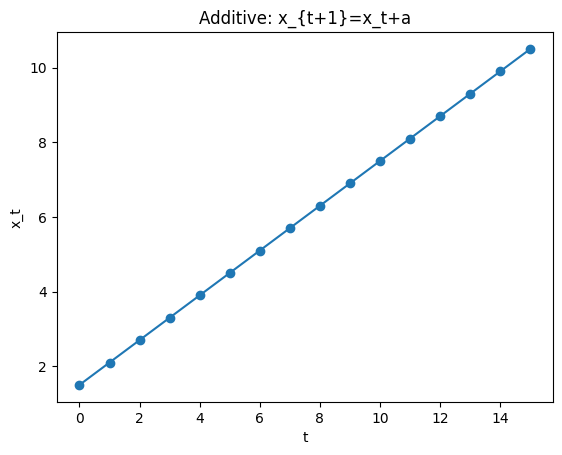

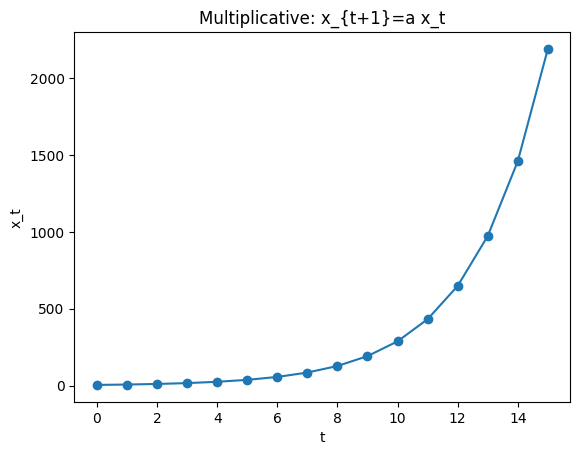

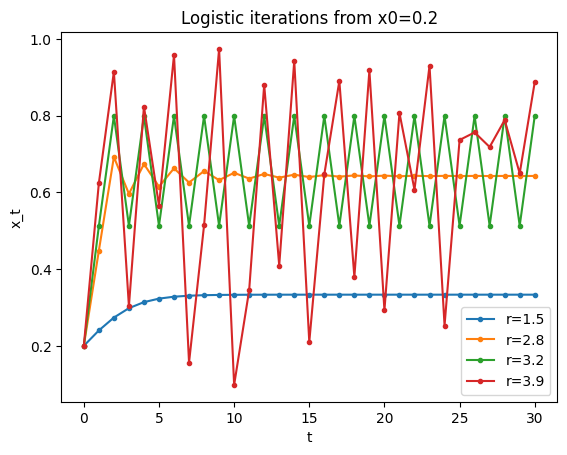

In [9]:
import numpy as np, matplotlib.pyplot as plt
t = np.arange(0, 16)
# Additive example
x0_add, a_add = 1.5, 0.6 #Change these values to see different behaviours. 
x_add = x0_add + a_add*t
plt.figure(); plt.plot(t, x_add, marker='o'); plt.xlabel('t'); plt.ylabel('x_t');
plt.title('Additive: x_{t+1}=x_t+a'); plt.show()

# Multiplicative example
x0_mul, a_mul = 5.0, 1.5 #Change a_mul to see different behaviors!!!! DO IT. DO IT NOW!
x_mul = x0_mul*(a_mul**t)
plt.figure(); plt.plot(t, x_mul, marker='o'); plt.xlabel('t'); plt.ylabel('x_t');
plt.title('Multiplicative: x_{t+1}=a x_t'); plt.show()

# Logistic sweep (trajectory-only preview)
def logistic_step(r, x): return r*x*(1-x)
for r in [1.5, 2.8,3.2, 3.9]: # This plots several trajectories for different values of r. Notice the periodicity at r=3.2 and the chaos at r=3.9
    x = 0.2; traj = [x]
    for _ in range(30): x = logistic_step(r, x); traj.append(x)
    plt.plot(traj, marker='.', label=f'r={r}')
plt.title('Logistic iterations from x0=0.2'); plt.xlabel('t'); plt.ylabel('x_t'); plt.legend(); plt.show()

## 3. Equilibria and stability (stable / unstable / **neutral**)

An **equilibrium** $x^*$ satisfies $x^*=F(x^*)$. Intuitively, an eqilibrium is a special point value $x^*$ such that if we choose it as our initial point, $x_0=x^*$, then the dynamical system stays there, $x_1=F(x^*)=x^*$, $x_2=F(x_1)=F(x^*)=x^*$,... and so on forever.

Equilibria can come in several flavours. A stable equilibrium is an equilibrium $x^*$ such that if we deviate slightly away from $x^*$, say $x_0=x^*+\varepsilon$ for a small $\epsilon$ as our initial value, then the successive $x_i$'s get closer and closer back to $x^*$ (it's an ``attractor''). As a physical example, thing of a ball in a bowl: at rest, the ball wants to stay at the lowest point at the bottom of the bowl, and if you bump it away from the bottom, it slowly rolls back and forth until it approaches the bottom again. 

What is an unstable equilibrium? Imagine a ball and a bowl again, but this time the bowl is upside down, and the ball is balancing on the outside. If you balance the ball **just** right at the highest point of the bowl, it will stay there (it's an equilibrium point!), but if you bumpt it ever so slightly, it rolls off (away from the equilibrium). An unstable equilibrium $x^*$ then is an equilibrium such that if we deviate slightly, say $x_0=x^* + \varepsilon$ for some small $\varepsilon$, then the successive $x_i$'s move away from $x_0$ (it ``repels'' them). 


Equilibria can also be more complicated, or combinations of stable/unstable depending on the direction of approach. You can also have strange periodic patterns, that feel like equilibria, but are actually called "cycles" or "orbits". 


Slope test (when $F'$ exists at $x^*$):

- $|F'(x^*)|<1$ ⇒ **stable** (nearby points move toward $x^*$).
- $|F'(x^*)|>1$ ⇒ **unstable** (move away).
- $|F'(x^*)|=1$ ⇒ **neutral/borderline** (requires deeper analysis; can be periodic or slowly drifting).



## 4. Cobweb diagrams: solving step‑by‑step when no formula exists

***Algorithm:*** Draw $y=F(x)$ and the diagonal $y=x$, then iterate:
1. **Vertical:** $(x_t, x_t) \to (x_t, F(x_t))$.
2. **Horizontal:** $(x_t, F(x_t)) \to (F(x_t), F(x_t))$.

Repeat to see convergence/divergence/periodicity. **Cobwebbing is ideal for first‑order 1D maps.**

**Higher‑order models (with lags):** If $F$ uses $A_{t}$ and $A_{t-1}$, the natural phase space is 2D; the simple 1D cobweb no longer applies directly. You can still visualize iteration with a 2D state plot or by fixing one coordinate to explore slices.


### Connection with Equilibria

A cobweb diagram is a nice way to study/visualize the equilibria of a simple dydnaical systemt $x_{t+1}=F(x_t)$. By definition, an equilibria is a "fixed point" of the system, i.e. $F(x^*)=x^*$, and so on the cobweb diagram, we can observe equilibria exactly as the points where the curves $y=x$ and $y=F(x)$ intersect, since those are exactly the values $x$ for which $x=y=F(x)\Rightarrow x=F(x)$. We can then try to study the type of equilibria they are *numerically* by choosing initial values $x_0$ *near* $x^*$ and observing how the system progresses in various cases. 

### 4.1 Static cobweb schematic (hard‑coded steps)

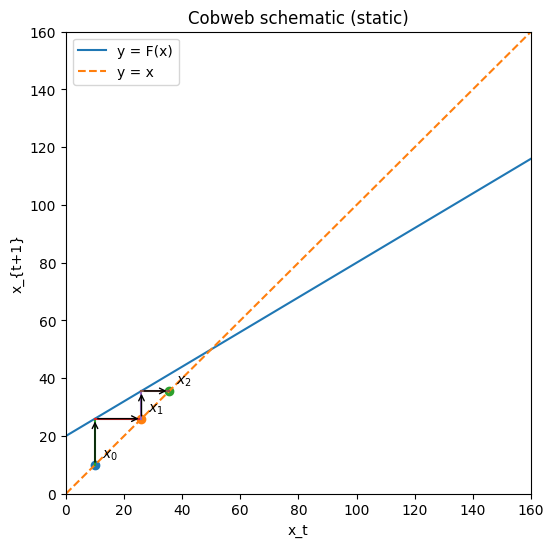

In [10]:
#DO NOT EDIT THIS CELL! This just creates a picture for you to see how the cobweb algorithm works. 

import numpy as np, matplotlib.pyplot as plt
x_min, x_max = 0.0, 160.0
xx = np.linspace(x_min, x_max, 600)
def F(x): return 0.6*x + 20.0
yy = F(xx)
x0 = 10.0
y0 = F(x0)
x1, y1 = y0, F(y0)
x2, y2 = y1, F(y1)
plt.figure(figsize=(6,6))
plt.plot(xx, yy, label='y = F(x)'); plt.plot(xx, xx, '--', label='y = x')
for (xa,ya,label) in [(x0,x0,'$x_0$'),(x1,x1,'$x_1$'),(x2,x2,'$x_2$')]:
    plt.scatter([xa],[ya]); plt.annotate(label,(xa,ya), textcoords='offset points', xytext=(5,5))
plt.plot([x0,x0],[x0,y0]); plt.annotate('', xy=(x0,y0), xytext=(x0,x0), arrowprops=dict(arrowstyle='->'))
plt.plot([x0,y0],[y0,y0]); plt.annotate('', xy=(y0,y0), xytext=(x0,y0), arrowprops=dict(arrowstyle='->'))
plt.plot([x1,x1],[x1,y1]); plt.annotate('', xy=(x1,y1), xytext=(x1,x1), arrowprops=dict(arrowstyle='->'))
plt.plot([x1,y1],[y1,y1]); plt.annotate('', xy=(y1,y1), xytext=(x1,y1), arrowprops=dict(arrowstyle='->'))
plt.xlim(x_min,x_max); plt.ylim(x_min,x_max)
plt.xlabel('x_t'); plt.ylabel('x_{t+1}')
plt.legend(); plt.title('Cobweb schematic (static)'); plt.show()

### 4.2 Build‑your‑own cobweb (scaffold)
**Describe your approach in comments, then implement.**

Steps: (i) plot $y=F(x)$ and $y=x$; (ii) start at $x_0$; (iii) vertical to $(x_0,F(x_0))$; (iv) horizontal to $(F(x_0),F(x_0))$; (v) repeat.

**Coding tip:** `plt.plot([x_start,x_end],[y_start,y_end])` draws a segment.

In [11]:
import numpy as np, matplotlib.pyplot as plt
%matplotlib inline

def cobweb_plot(F, title, x0=10.0, n_steps=3, x_min=0.0, x_max=100, label=False):
    """Implements the 1D cobweb described above for: 
    - input function F 
    - title of the cobweb plot
    - number of steps
    - mininum x value
    - maximum x value
    - labels the points of each segment (x1, x2, x3, etc.)"""
    xx = np.linspace(x_min, x_max, 600)     #prepare x values for the function to plot
    #plot code
    plt.figure(figsize=(6,6))
    plt.plot(xx, F(xx), label='F(x)'); plt.plot(xx, xx, '--', label='y = x')    #plot F(x) and y=x
    plt.xlim(x_min,x_max); plt.ylim(x_min,x_max)
    plt.xlabel('x_t'); plt.ylabel('x_{t+1}') #labels the graph
    
    xt = x0     #xt for some value x starting from x0
    for i in range(n_steps+1):    #updates xt [n_steps+1] amount of times; this results in n_steps amount of steps
        if i==0:    #plots the first point
            plt.scatter([xt],[xt])
        else:   #draws the connecting vert and horiz lines and plots subsequent points
            plt.plot([xt,xt],[xt,F(xt)]); plt.annotate('', xy=(xt,F(xt)), xytext=(xt,xt), arrowprops=dict(arrowstyle='->'))     #draws vert
            plt.plot([xt,F(xt)],[F(xt),F(xt)]); plt.annotate('', xy=(F(xt),F(xt)), xytext=(xt,F(xt)), arrowprops=dict(arrowstyle='->'))     #draws horiz    
            xt = F(xt)      #prepares for next point
            plt.scatter([xt],[xt])      #plots
        if label: 
            plt.annotate(f"x{i}",(xt,xt), textcoords='offset points', xytext=(1,1)) 
    plt.legend(); plt.title(f"Cobweb schematic: {title}"); plt.show() #legends, title, shows the plot

### 4.3 Observing Some equilibria on Cobweb Diagrams. 

Use your cobwebbing code to study the equilibria of the following DTDSs. Try to choose different initial values near the equilibria to study their properties. 


1. Stable: $F(x)=0.6x+20$ ($x^*=50$).
2. Unstable: $F(x)=1.2x$ ($x^*=0$ repelling).
3. Neutral periodic: $F(x)=1-x$ (fixed point 0.5 neutral; 2‑cycle behavior).

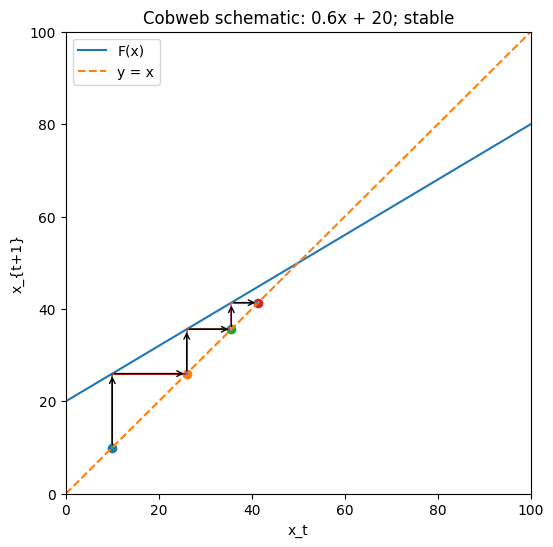

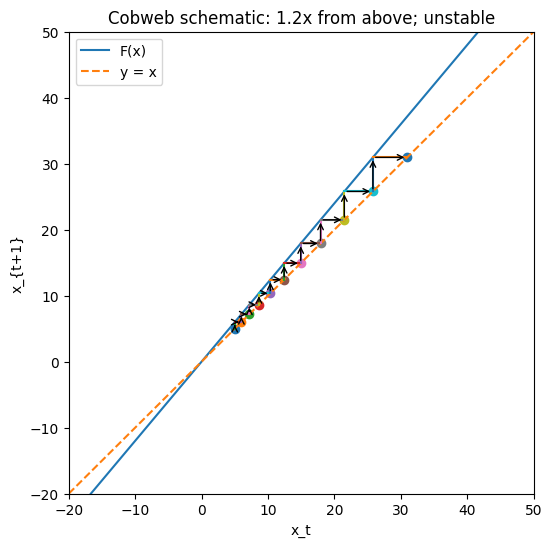

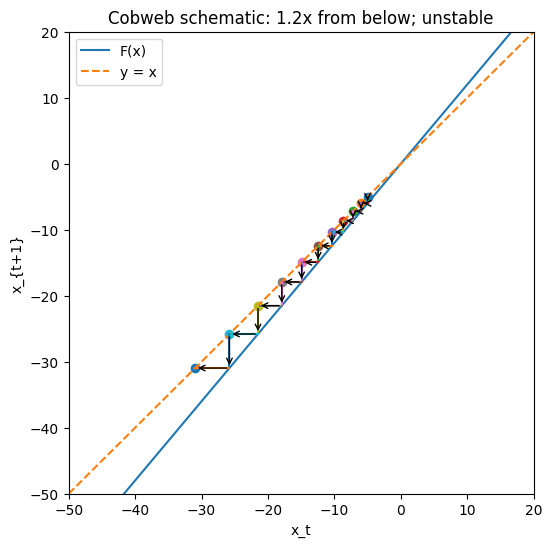

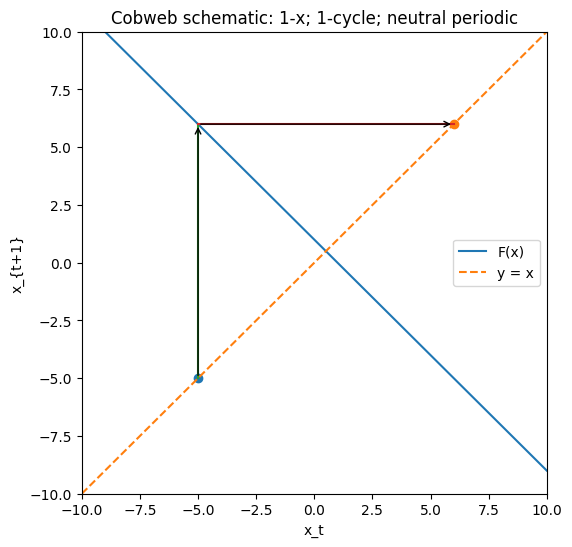

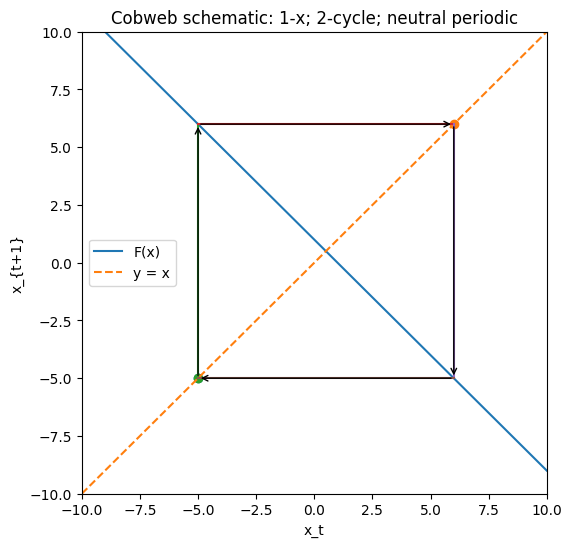

In [12]:
#Use your cobwebbing on the above systems here. 

def F(x): return 0.6*x + 20.0      #stable
cobweb_plot(F, "0.6x + 20; stable")

def F(x): return 1.2*x             #unstable
cobweb_plot(F, "1.2x from above; unstable", 5.0, 10, -20.0, 50)  #above
cobweb_plot(F, "1.2x from below; unstable", -5.0, 10, -50.0, 20)  #below

def F(x): return 1-x               #neutral periodic
cobweb_plot(F, "1-x; 1-cycle; neutral periodic", -5.0, 1, -10, 10)    #1-cycle
cobweb_plot(F, "1-x; 2-cycle; neutral periodic", -5.0, 2, -10, 10)    #2-cycle



### 4.4 Cobweb practice on the logistic family
Use your cobweb on the logistic map $x_{t+1}=r x_t(1-x_t)$ for $r\in\{1.5, 2.8,3.2,3.9\}$. Start from $x_0=0.2$. Describe what you see (fixed point? 2‑cycle? something else?).

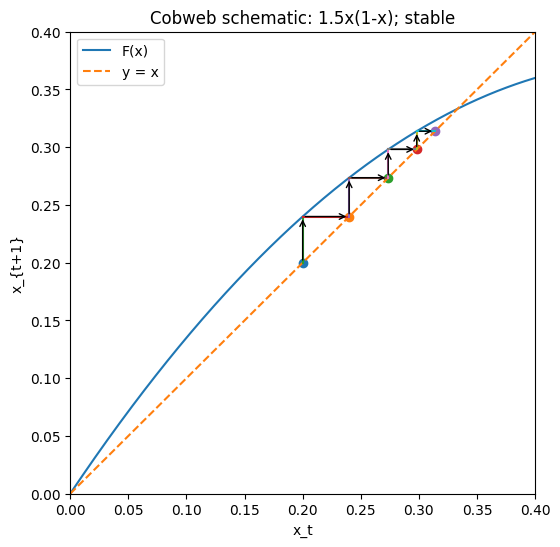

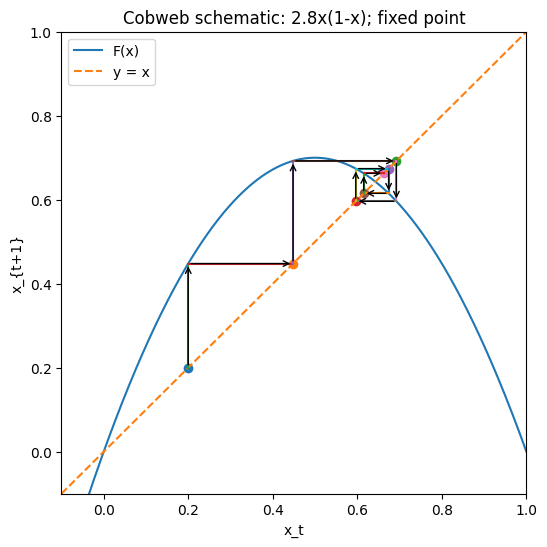

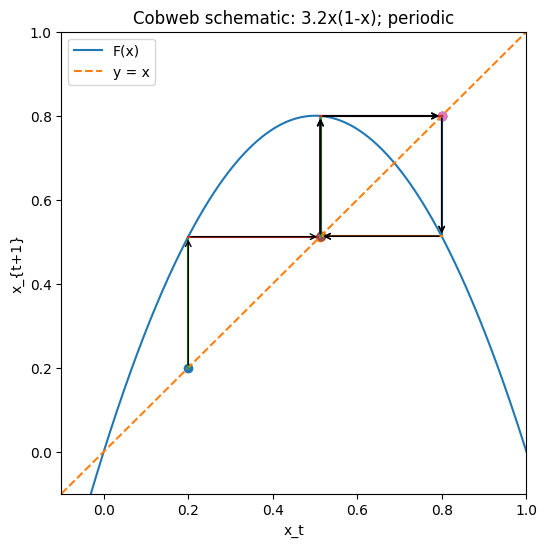

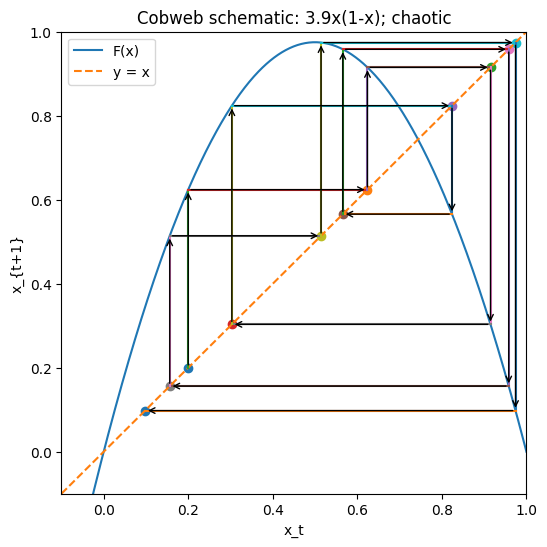

In [13]:
#Cobweb for the logistic map here, looking at the various r values. 
def F(x): return 1.5*x*(1-x)        #stable
cobweb_plot(F, "1.5x(1-x); stable", 0.2, 4, 0.0,0.4) 

def F(x): return 2.8*x*(1-x)        #fixed point
cobweb_plot(F, "2.8x(1-x); fixed point", 0.2, 6, -0.1, 1) 

def F(x): return 3.2*x*(1-x)        #periodic
cobweb_plot(F, "3.2x(1-x); periodic", 0.2, 6, -0.1, 1)

def F(x): return 3.9*x*(1-x)        #chaotic
cobweb_plot(F, "3.9x(1-x); chaotic", 0.2, 10, -0.1, 1)

## 5. Your drug DTDS (own drug; baseline with lag/split)

Everyone must use their **assigned drug** from the Drug Card. You may refine the model if justified and kept discrete‑time.

### Baseline model
$$A_{t+1}=\rho A_t + U_{t+1},\qquad 0<\rho<1.$$
- $\rho=2^{-1/t_{1/2}}$ from the half‑life $t_{1/2}$.
- $U_{t+1}$ is built from a **dose sequence** $D_h$ using a **two‑hour absorption** with optional **lag**:
$$U_{t+1}=\text{bioavail}\,\Big[s\,D_{t+1-\text{lag}}+(1-s)\,D_{t-\text{lag}}\Big].$$

**About cobwebs here:** This model is first‑order in $A_t$, so a 1D cobweb works **if** $U_{t+1}$ is a fixed function of $t$ (e.g., same schedule). If you introduce additional state (e.g., an absorption reservoir), the system becomes higher‑order and the classic 1D cobweb doesn’t directly apply.

### Drug Card (you may replace with your own values if citing sources)
| Drug | Typical dose | Bioavailability | Half-life (h) | Lag (h) | Notes |
|---|---|---|---|---|---|
| Acid (Lysergic Acid Diethylamide; LSD) | 100 µg | ~0.7 (oral) | 3–5 h | 0.5–1 | Potent; variable oral bioavailability. |
| Anabolic steroids | 5–50 mg | 0.3–0.9 | hours–days | 0–2 | Large variation across compounds, esters. |
| Birth control pills (Oestrogen/Estradiol) | 0.02–0.05 mg | ~0.4 | 13–27 h | 0–1 | First-pass metabolism significant. |
| Cocaine | 20–50 mg | 0.3–0.9* | 0.7–1.5 h | 0–0.5 | Depends on route (*higher by non-oral routes). |
| Ecstasy (3,4-Methylenedioxymethamphetamine; MDMA) | 75–125 mg | ~0.65 | 7–9 h | 0.5–1 | Nonlinear kinetics reported at high doses. |
| Ketamine | 25–50 mg | 0.2–0.5 | 2–3 h | 0–0.5 | Route-dependent, active metabolites. |
| Xanax (Alprazolam; benzodiazepines) | 0.25–1 mg | ~0.9 | 11–16 h | 0–1 | High oral bioavailability. |
| Magic Mushrooms (Psilocybin) | 10–25 mg (psilocybin) | ~0.5 | 2–3 h (psilocin) | 0.5–1 | Conversion to psilocin; variability. |
| Marijuana (Tetrahydrocannabinol; THC) | 5–20 mg (oral) | ~0.06–0.2 | hours–days | 0.5–1 | Very low oral F; fat partitioning. |
| Nicotine | 1–2 mg (cig) | 0.2–0.8 | 1–2 h | 0–0.25 | Route-dependent; fast absorption by inhalation. |
| Adderall (Amphetamine: Dextroamphetamine) | 5–20 mg | ~0.75 | 9–14 h | 0–1 | pH-dependent renal elimination. |
| Rohypnol (Flunitrazepam) | 1–2 mg | ~0.8 | 18–26 h | 0–1 | Long half-life; benzodiazepine. |

### Helper functions 

**Design goal:** clearly separate *dosing*, *absorption*, and *system update* so you can swap/extend parts.

`rho_from_half_life(t_half_hours)`
: Returns $\rho=2^{-1/t_{1/2}}$, the per‑hour retention implied by half‑life in hours.

`make_dose_sequence(T_end, doses_at_hours)`
: Builds a discrete array `D` of length `T_end+1` where `D[h]` is the total dose at hour `h`. If multiple doses share an hour, they are summed.

`apply_absorption(D_seq, bioavail, lag_hours, split_fraction)`
: Converts raw doses `D` into absorbed input `U` using a two‑hour split controlled by `split_fraction` (`s`) and optional lag `L` in hours:
$$U_{t+1}=\text{bioavail}\,( s\,D_{t+1-L} + (1-s)\,D_{t-L} ).$$
Out‑of‑range indices are treated as 0.

`simulate_dtds(rho, U, A0)`
: Given $\rho$, input `U`, and initial amount `A0`, returns arrays of times and amounts $(t,A_t)$, iterating $A_{t+1}=\rho A_t + U_{t+1}$.

In [14]:
import numpy as np
def rho_from_half_life(t_half_hours: float) -> float:
    """Convert half-life (hours) to per-hour retention rho.
    Formula: rho = 2^(-1 / t_half). Example: t_half=6h -> rho≈2^(-1/6)."""
    return 2.0 ** (-1.0 / float(t_half_hours))
def make_dose_sequence(T_end: int, doses_at_hours):
    """Construct the discrete dose array D[0..T_end].
    - T_end (int): last hour in the simulation (inclusive).
    - doses_at_hours: iterable of (hour:int, amount:float) pairs.
    Returns: numpy array D of length T_end+1 with D[h] = sum of doses at hour h."""
    D = np.zeros(T_end + 1, dtype=float)
    for h, amount in doses_at_hours:
        if 0 <= h <= T_end:
            D[h] += float(amount)  # multiple doses at same hour add up
        # else: silently ignore out-of-range hour
    return D
def apply_absorption(D_seq: np.ndarray, bioavail: float = 1.0, lag_hours: int = 0, split_fraction: float = 1.0):
    """Compute absorbed input U from raw doses D using a two-hour split with optional lag.
    U[t+1] = bioavail*( s*D[t+1-lag] + (1-s)*D[t-lag] )
    - D_seq: numpy array of doses per hour (length T+1)
    - bioavail in [0,1]: fraction that reaches systemic circulation
    - lag_hours (int): shift in hours before absorption starts
    - split_fraction s in [0,1]: portion absorbed in the *next* hour vs the current hour
    Returns: numpy array U of same length as D_seq with U[0]=0 by convention."""
    T = len(D_seq) - 1
    U = np.zeros_like(D_seq, dtype=float)
    s = float(split_fraction); L = int(lag_hours)
    for t in range(T):
        # pick two adjacent dose bins (with lag) that feed into the next absorption bin
        a = D_seq[t + 1 - L] if 0 <= t + 1 - L <= T else 0.0
        b = D_seq[t     - L] if 0 <= t     - L <= T else 0.0
        U[t + 1] = float(bioavail) * (s * a + (1.0 - s) * b)
    return U
def simulate_dtds(rho: float, U: np.ndarray, A0: float = 0.0):
    """Simulate A_{t+1} = rho*A_t + U_{t+1} for t=0..T-1.
    - rho in (0,1): per-hour retention
    - U: absorbed input per hour, length T+1 (with U[0]=0)
    - A0: initial amount at t=0
    Returns: (t_array, A_array) of length T+1."""
    T = len(U) - 1
    A = np.zeros(T + 1, dtype=float)
    A[0] = float(A0)
    for t in range(T):
        A[t + 1] = rho * A[t] + U[t + 1]
    return np.arange(T + 1), A

## 6. Applied Math — Complete all parts for your drug

### You can add code cells as needed.

**(a) Model proposal (baseline or justified variant).**
- Write your updating rule clearly (e.g., baseline above or a justified variant, more sophisticated variant such as a non-linear updating function, or a2‑compartment DTDS with a gut reservoir state).
- Define **every parameter** (units, biological meaning). Explain why the values are reasonable for your drug. Ensure that your units make sense!!

In [15]:
def baseline(hl, end, dhours, bavail, lag, split):
    '''Baseline updating rule from above: Simulate A_{t+1} = rho*A_t + U_{t+1} for t=0..T-1.
    where rho in (0,1): per-hour retention; U: absorbed input per hour; length T+1 (with U[0]=0); A0: initial amount at t=0
    Returns: (t_array, A_array) of length T+1.
    Inputs: 
    - h1 is the half-life measured in hours --> used to find the rho
    - end is the last hour of the simulation; dhours is the dose at each hours --> used to build the array for dose sequences
    - bavail is the bioavailability --> used to find amount of drug actually absorbed; measured with a unitless percentage (converted to decimal form)
    - lag is the time it takes for the effects to take place --> it is measured in hours and is paired with the split
    - split is how the drug interacts within the body between \"compartments\" - used to seperate parts of the body that react quicker than others to better model fast distribution and slow release
    '''
    pAt = rho_from_half_life(hl) #find the per hour retention based on the half life
    Dh = make_dose_sequence(end, dhours) #makes array with dose amounts compared to time; length is equal to total hours of the simulation
    Ut = apply_absorption(Dh, bavail, lag, split) #apply the two hour absorption using the split fraction and accomodating for lag if applicable
    times, model = simulate_dtds(pAt, Ut) #returns the final time array and final drug level arrays
    return times, model

**(b) Parameter ranges with sources (table).**
- For each parameter (half‑life → $\rho$, bioavailability, lag, split), provide a realistic range and **one short citation**. In 2–4 sentences, justify your chosen working value inside that range.


**Response of (b)**
- There are many anabolic-androgenic steroids (AAS), so this model will specifically look at testosterone enanthate (with intramuscular injection), one of the more common forms of AAS. 
- The half life is around 96 - 120 hours or 4-5 days (Weinbaur et al. 1990) --> $\rho$ is around 0.9928 - 0.9942
- Almost 100% bioavailability when intramuscularly injected. A realistic range would be around 0.9 - 1.0 (FDA 2018)
- Observed lag of around 12 - 24 hours (Shoskes et al. 2016)
- Split fraction of 70 - 75% in the central compartment and 25 - 30% in the peripheral compartment (Shoskes et al. 2016). Final reasonable ranges for s is around 0.7 - 0.75

Chosen working values for the half-life will assume the longest of 120 hours to stimulate edge cases where the drug remains in the body for the longest period of time. For bioavailability, a value of 0.95 will be used, slightly less than 1.0 but still very high, representative of a bioavailability of nearly 100%. The observed lag will be at 24 hours, once again covering the scenario where the drugs stay in the body for the longest (including the lag time before the drug takes effect). The split fraction will be at 0.75, with more of the drug absorption happening early on.

**(c) Dosing scenarios (≥ 2).**
- Specify at least two schedules (times & amounts) that are realistic for your drug.
- Construct `D` and then `U` with your chosen bioavailability/lag/split.
- Simulate and plot $A_t$ for each scenario; label peaks and annotate the time‑to‑safe threshold you define in (e).

**Response of (c)**

Doses of between 50-100 mg every other day for 8-12 weeks are most common. The two schedules that will be analyzed will be the greater possible dosing for the longer time and the lower dosing for the shorter time. As such, the two schedules will be:
- 100 mg every 48 hours for 2016 hours
- 50 mg every 48 hours for 1344 hours

In [16]:
def time_to_threshold(A0, A_thresh, half_life_hours):
    """ Estimate hours for levels at the peak to drop to safe thresholds.
    -A0: peak
    -A_thresh: Safety threshold
    -half_life_hours: half-life of the drug in hours
    -Returns estimated hours to drop below threshold"""
    if A_thresh >= A0:
        return 0.0

    k = np.log(2) / half_life_hours
    t = float((np.log(A_thresh / A0)) / (-k))
    return t
#more about this function in part (e)

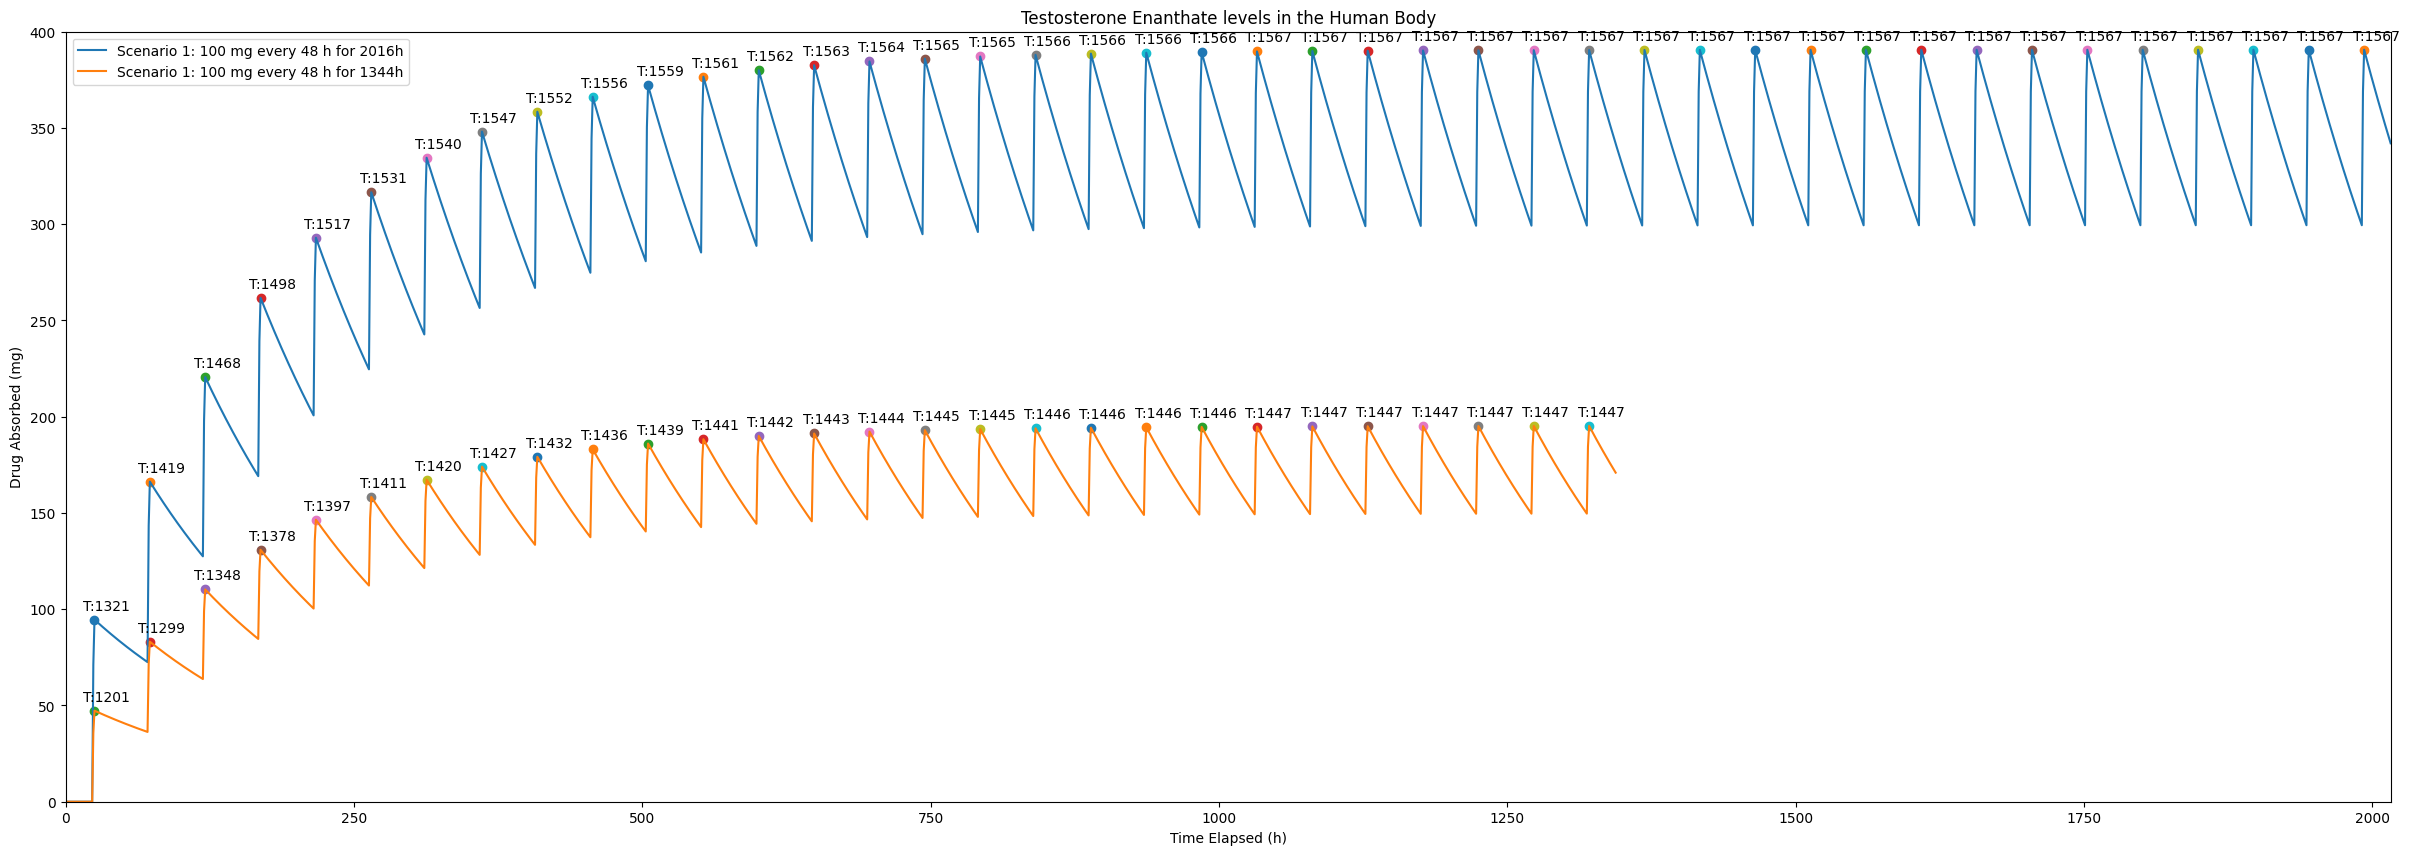

In [22]:
interval = 48       #time between doses
T_end1 = 2016       #last hour of the simulation
amount = 100.0      #dose amount
scenario1 = [(h, amount) for h in range(0, T_end1 + 1, interval)]       #setup to load all the dose arrays according to the dose cycle
Dose1 = make_dose_sequence(2016, scenario1)         #load all the dose arrays
Ut1 = apply_absorption(Dose1, 0.95, 24, 0.75)       #load up the two hour absorbance array

T_end2 = 1344       #last hour of the simulation
amount = 50.0       #dose amount
scenario2 = [(h, amount) for h in range(0, T_end2 + 1, interval)]       #setup to load all the dose arrays according to the dose cycle
Dose2 = make_dose_sequence(1344, scenario2)         #load all the dose arrays
Ut2 = apply_absorption(Dose2, 0.95, 24, 0.75)       #load up the two hour absorbance array

At1 = baseline(120, 2016, scenario1, 0.95, 24, 0.75)    #apply the baseline model
x1, y1 = At1        #store the two resultant arrays
At2 = baseline(120, 1344, scenario2, 0.95, 24, 0.75)    #apply the baseline model
x2, y2 = At2        #store the two resultant arrays

plt.figure(figsize=(30,10))
plt.plot(x1, y1, label='Scenario 1: 100 mg every 48 h for 2016h')       #plot schedule 1
A_thresh = 0.0458       #threshold
half_life = 120         #half-life

for i in range(42):     #estimates the number of peaks (the number of times dose was administered)
    T = 1 + 24 + i*48
    plt.scatter (x1[T], y1[T])
    A0 = y1[T]              #peak
    hours = time_to_threshold(A0, A_thresh, half_life)      #calculate the hours till levels return to safe thresholds
    plt.annotate(f"T:{round(hours)}", (x1[T]-10, y1[T]+5))          #label the thresholds @ the peaks

plt.plot(x2, y2, label='Scenario 1: 100 mg every 48 h for 1344h')       #plot schedule 2
for i in range(28):    #estimates the number of peaks (the number of times dose was administered)
    T = 1 + 24 + i*48
    plt.scatter (x2[T],y2[T])
    A0 = y2[T]      # peak
    hours = time_to_threshold(A0, A_thresh, half_life)      #calculate the hours till levels return to safe thresholds
    plt.annotate(f"T:{round(hours)}", (x2[T]-10, y2[T]+5))          #label the thresholds @ the peaks
plt.xlabel('Time Elapsed (h)'); plt.ylabel('Drug Absorbed (mg)')    #label your axis
plt.xlim(0,2016); plt.ylim(0,400)
plt.title("Testosterone Enanthate levels in the Human Body"); plt.legend()
plt.show()

**(d) Equilibria & stability (qualitative).**
- Under a constant‑rate input (e.g., same dose every $k$ hours), does your model have an equilibrium value $A^*$? If yes, find it and classify **stable/unstable/neutral** (argue using slope or a small‑perturbation simulation). Include a cobweb for a simplified 1D case if applicable.

**Response of (d)**

Since a $U_{t+1}$ varies too much and counts as an extra step (that is, not a constant value), and as such the baseline model cannot be considered a 1D model and a normal cobweb model will not work to find the equilibrium value. Instead, an alternative method outlined below can be used. 

From the equations in part 5: $A_{t+1}​=\rho A{t​+U},\rho=2^{−k/t_{1/2}}​,U=bioavail⋅D$, at equilibrium: $A^*=\rho A^*+U$. 
- Solving for equilibrium: $A^*=U/(1-\rho)$; with $U=0.95⋅100, \rho=2^{−48/120}$: $A^*=392.33 mg$
- Rewriting the equation as $F(A)=\rho A+U$: the absolute value of the derivative can be found: $|F'(A)|=\rho$. From here, whether $A^*$ is stable/unstable/neutral can be determined:
- Since $0<\rho=0.7579<1$, the equilibrium is stable.

392.33223121203355 0.757858283255199


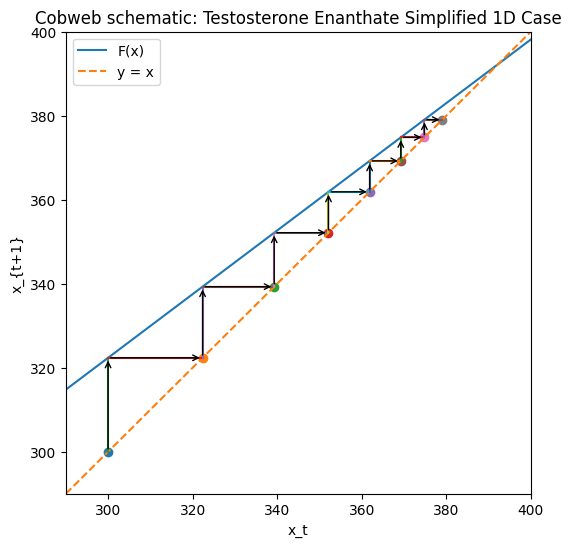

In [23]:
#utilizing the simplified equations from above, a simplified 1D model can be created, and a cobweb plot can be constructed. 
rho = (2)**(-48/120)
u = (0.95*100) 
Aequil1 = u/(1-rho)
print(Aequil1, rho)

def Aequil(A): Fa=rho*A + u ; return Fa     #create the simplified question to construct the cobweb plot around

cobweb_plot(Aequil, 'Testosterone Enanthate Simplified 1D Case', 300, 7, 290, 400)

**(e) Time‑to‑safe and peak analysis.**
- Define a safety threshold for your drug (with a short citation). After a given peak, estimate hours to drop below threshold. Explain assumptions (for instance, ignoring new inputs → geometric decay $\approx \rho^k A$).

**Response of (e)**

The typical safety threshold for testosterone enanthate will be assumed to be the upper levels of testosterone naturally found within the human body, around 900 nanograms / decilitre (Travison et al. 2017). Assuming an average plasma level of 5L, the average levels are around 0.0458 milligrams.

Assumptions: average plasma levels are at 5L, upper levels of testosterone as the threshold, conditions where no new inputs are added past the peak, geometric decay (every step decreases by a set percentage, not a flat amount).

In [24]:
def time_to_threshold(A0, A_thresh, half_life_hours):       #function to calculate the amount of hours required for a peak to return to safe thresholds
    """ Estimate hours for levels at the peak to drop to safe thresholds.
    -A0: peak
    -A_thresh: Safety threshold
    -half_life_hours: half-life of the drug in hours
    -Returns estimated hours to drop below threshold"""
    if A_thresh >= A0:
        return 0.0      #already at or below the safety threshold, meaning that no more hours need to pass to reach the safety threshold

    k = np.log(2) / half_life_hours
    t = float((np.log(A_thresh / A0)) / (-k))  #calculate the time to safety threshold
    return t

**(f) Sensitivity to a parameter.**
- Sweep one parameter (e.g., bioavailability from 0.3→0.9) and plot how **peak $A_t$** and **time‑to‑safe** change. Write 3–5 sentences interpreting what the slopes/curves mean practically.

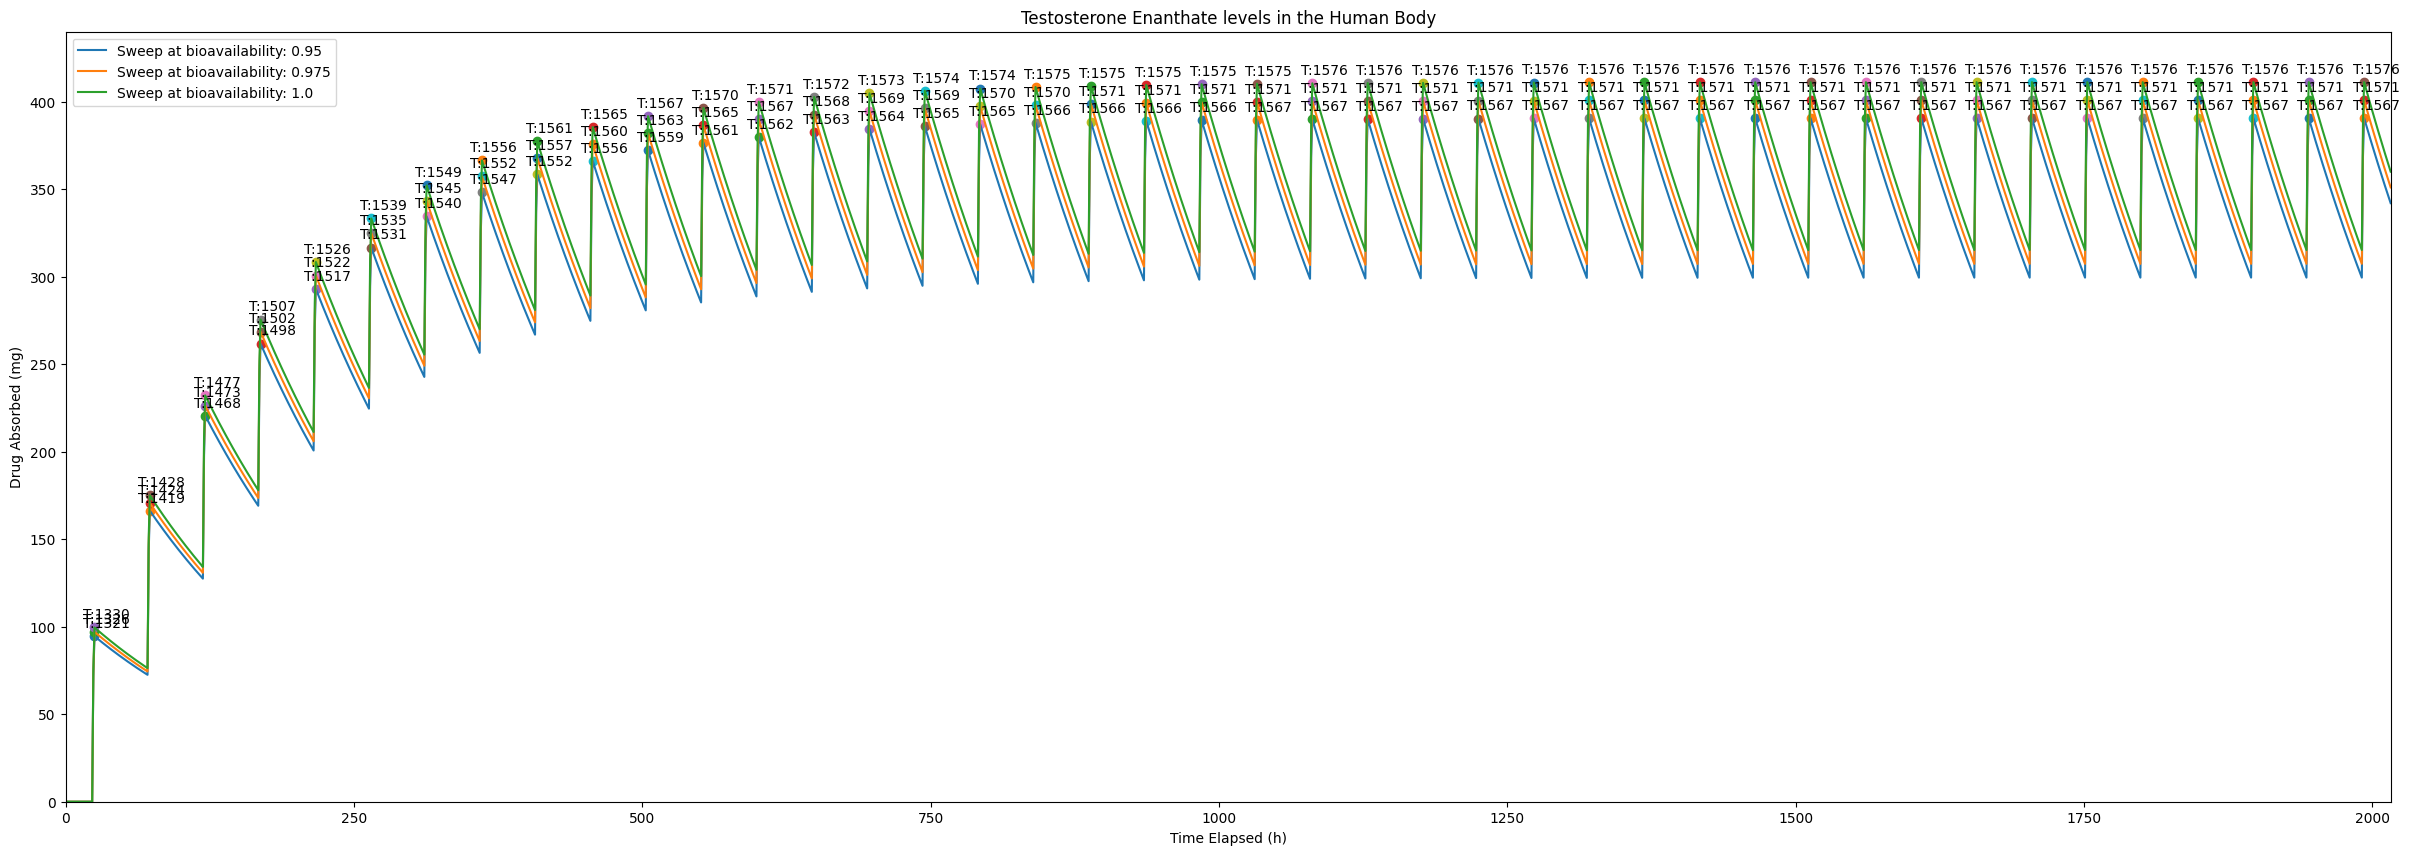

In [25]:
plt.figure(figsize=(30,10))
for b in range(0,3):        #for loop to manage the production of 3 curves with slight modifications easier
    bioavail = 0.95 + 0.025*b       #scaling bioavailability based on which curve is being graphed
    T_end = 2016        #final hour
    interval = 48       #time between doses
    amount = 100.0      #dose amount
    scenario1 = [(h, amount) for h in range(0, T_end + 1, interval)]        #setup for array for dose amounts to times
    Dose = make_dose_sequence(2016, scenario1)          #creates array for dose amounts to times
    Ut = apply_absorption(Dose1, 0.95, 24, 0.75)        #apply the two hour absorption to created array

    At = baseline(120, 2016, scenario1, bioavail, 24, 0.75)     #apply the baseline model
    x, y = At       #store the two resultant arrays
    A_thresh = 0.0458       #threshold
    half_life = 120         #half life
    for i in range(42):     #number of peaks (times the drug was administered)
        T = 1 + 24 + i*48
        plt.scatter (x[T], y[T])
        A0 = y[T]      # peak

        hours = time_to_threshold(A0, A_thresh, half_life)      #calculate the time to reach the safety threshold from the peaks
        plt.annotate(f"T:{round(hours)}", (x[T]-10, y[T]+5))
    plt.plot(x, y, label=f"Sweep at bioavailability: {bioavail}")       #plot and name each curve appropriately
plt.xlabel('Time Elapsed (h)'); plt.ylabel('Drug Absorbed (mg)')        #label the axis
plt.xlim(0,2016); plt.ylim(0,440)               #set max and min values of the graph
plt.title("Testosterone Enanthate levels in the Human Body"); plt.legend(); plt.show()  #title, legend, and show the plot

**Response of (f)**

Each curve represents how much the drug is absorbed as different bioavailabilities from the usual range (0.95 to 1.0) are used. A higher bioavailability means more of the drug can be absorbed, which leads to the increasing y-values observed. As it is the only parameter that changes, the general shape of the curve will not change (the same dosages with the same schedule are still being used). The overall increase of peaks should also be expected, as more of the drug can be absorbed.The higher peaks also explain the increased time it takes to reach safe thresholds.

**(g) Inverse update (conceptual).**
- For an affine step $A_{t+1}=\rho A_t + b_t$, the formal inverse is $A_t=(A_{t+1}-b_t)/\rho$. Discuss feasibility (nonnegativity, bounds). If you introduce nonlinearities or extra states, is the inverse unique? Explain.

**Response of (g)**

The first bound is that $\rho$ cannot be 0. If this were true, the equation would be $A_{t+1}=b_t$, meaning that $A_{t+1}$ is completely unaffected by $A_t$, and that any value for $A_t$ will return the same value $b_t$. Generally, to be considered feasible and within proposed bounds, the calculated value of $A_t$ from the inverse needs to be between the proposed minimum and maximum $A: A_{min} \leq A_t \leq A_{max}$. If the calculated inverse lies outside of these bounds, there may be no feasible solution or a mistake in the model. Due to how $\rho$ is calculated (2 to the power of an exponent divided by time, which is always positive), it will always be positive. Since $b_t$ ($U_t$ in the model) represents the two-hour drug absorption, it should always be positive as well, as negative amounts of drug absorbance should not normally be observed when a dose is received. As such, $A_{t+1} \geq b_t$ needs to be true to uphold nonnegativity. $A_{t+1}$ also needs to be positive. 

If nonlinearities or extra states are introduced, more conditions need to be true for the inverse to be unique. Linearities (with slope $\neq$ 0) are injective and thus invertible: the inverse of such functions then will always be unique. The same injectivity/invertibility principle applies to nonlinearities as well: only functions that are injective and invertible will have unique inverses; otherwise there may be certain points that could return two or more inverses (not unique). For extra states (in the form $A_{t+1} = F{A_t} + b_t$ where $b_t = g(u_t)$): the extra state must be fully known or the inverse may not be unique. Even if the function is invertible, simply knowing the $A_{t+1}$ cannot ensure that unique inverses are present, as different $A_t , u_t$ pairs may also result in that $A_{t+1}$.

**(h) Reflection (limitations & next steps).**
- Name one limitation of your model for this drug and propose a feasible improvement for a future version.

**Response of (h)**

A limitation with this model of the drug lies within the split-fraction, which is a simplification of how much of the drug is absorbed per the two hour; that is the portion absorbed in the first hour and the portion absorbed in the second hour. The current model assumes that this split remains constant throughout every cycle, which across upwards of 20 dosages for well over 1000 hours (even for just the modest cycle) is highly unlikely. A simple resolution to this is to add some variance to the split fraction to replicate the difference in how absorption is split. This same randomness can also be readily applied to the bioavailability, which also experiences random errors that are not properly captured by this model.

## 7. Choose one cross‑section connection (with code & narrative)

Pick **one** option or propose your own. Provide **(i)** a small amount of code that produces a figure/table and **(ii)** a written explanation.

### A. Applied Life Science — Homeostasis/feedback
**Goal:** Relate $\rho$ and $U$ to adaptation (tolerance/withdrawal).
- Code task: Run two 7‑day simulations: baseline vs **15% faster elimination** (smaller $\rho$). Keep dosing the same. Plot both $A_t$ curves, label peaks and time‑to‑safe. Compute the difference in average exposure.
- Write‑up (≈150–200 words): Explain how changing $\rho$ affects steady state vs peaks, and what that implies for homeostatic adaptation.

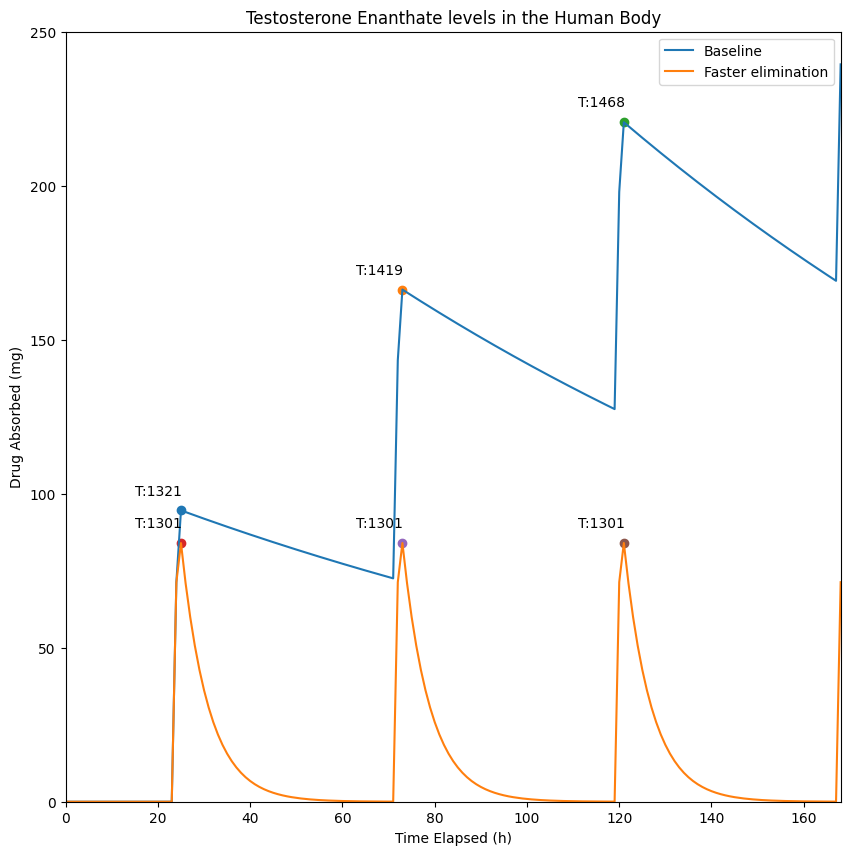

In [21]:
plt.figure(figsize=(10,10))
for b in range(0,2):
    if b == 0:
        Title = "Baseline"
        scale = 1
    else:
        Title = "Faster elimination"
        scale = 0.85
    bioavail = 0.95
    T_end = 168
    interval = 48
    amount = 100.0
    scenario1 = [(h, amount) for h in range(0, T_end + 1, interval)]
    Dose = make_dose_sequence(T_end, scenario1)
    Ut = apply_absorption(Dose1, 0.95, 24, 0.75)

    pAt = rho_from_half_life(120) * scale
    Dh = make_dose_sequence(T_end, scenario1)
    Ut = apply_absorption(Dh, bioavail, 24, 0.75)
    x, y = simulate_dtds(pAt, Ut)
    
    for i in range(3):
        T = 1 + 24 + i*48
        plt.scatter (x[T], y[T])
        A0 = y[T]      # peak
        A_thresh = 0.0458 # threshold
        half_life = 120

        hours = time_to_threshold(A0, A_thresh, half_life)
        plt.annotate(f"T:{round(hours)}", (x[T]-10, y[T]+5))
    plt.plot(x, y, label=Title)
plt.xlabel('Time Elapsed (h)'); plt.ylabel('Drug Absorbed (mg)')
plt.xlim(0,168); plt.ylim(0,250)
plt.title("Testosterone Enanthate levels in the Human Body"); plt.legend()
plt.show()

**Write-up**

Changing the $\rho$ affects the steady state in this case by reducing it to (or near) 0. From this graph and the previous graphs, the relationships with the unaltered $\rho$ had munch higher steady state in comparison. Observations from the graph show a continued increase in steady state beyond the seven day simulation above. In addition to the much lower steady state, the overall peaks have also greatly decreased and with it the time to threshold. This observed decrease likely lies in the meaning of $\rho$, the retention of the drug per hour. A dcreased retention means that less of the drug is retained after every hour, naturally meaning that less of it builds up in the body, leading to lower peaks and a lower steady state. In the example above with the particular dosing schedule, the steady state actually reached zero, meaning that the body did not retain any of the drug between doses. This contrasts greatly with the full $\rho$ value with a much higher steady state, as more of the drug is retained and built up over time as doses add up. Prolonged drug usage often results in built up tolerence to the drug by the body. This built up tolerance is usually the result of the body adapting to the large amounts of drugs it receives. The decreased $\rho$ (retention rates) reflect this increased tolerance; the body is able to clear the drugs out faster leading to a decreased retetion (Peper 2004). Withdrawal issues occur when changes to this adaptation occur. The body, now used to the constant influx of testosterone receives a shift to its homeostasis after the user lowers their dosages or increases the time between dosages (Poulos and Cappell 1991). Their homeostasis is disrupted as the steady state they were used to drastically decreases below the body's comfortable zone, leading to symptoms of withdrawal, most notably that of cravings - the body's desire to return to homeostasis. The adaptation also reflects a common trend where users gradually increase the quantity of drugs they consume; as their body adapts and builds tolerence, their steady state readily decreases with their old dosing schdule, leading many to alter their dosing schedule such that they are consistently consuming more drugs to reach homeostasis again.

### B. Applied Chemistry — $\log P/\log D_{7.4}$ and bioavailability
**Goal:** Connect chemical properties to your `bioavailability`.
- Code task: Write a function that sweeps `bioavailability` over a realistic range for your drug (e.g., 0.3–0.9). For a fixed dosing plan, re‑simulate and compute **peak $A_t$** and **time‑to‑safe** for each value; plot both vs `bioavailability`.
- Write‑up (≈150–200 words): Using a quick literature look on **lipophilicity** and **ionization** (e.g., $\log P/\log D_{7.4}$), argue what a plausible range is for your drug and interpret the sensitivity plot.
- Hint: $\log D_{7.4}$ differs from $\log P$ by accounting for ionization at pH 7.4; more ionized → lower membrane permeability → lower effective `bioavailability`.

### C. Applied Earth Science — Two‑box environmental DTDS
**Goal:** Map personal pharmacokinetics to a simple environmental fate model.
- Code task: Build a 2‑box model (Water, Sediment) driven by your **excreted** amount (you may approximate excretion as proportional to $A_t$ or to $(1-\rho)A_t$). Include exchange and loss rates, then plot both boxes over time for a day‑level input.
- Write‑up (≈150–200 words): Explain how **residence time** in each box relates to your $\rho$ and why peaks/timing matter for sampling.

### D. Applied Physics — Stock–leak analogy and inverse sensitivity
**Goal:** Show why the inverse step is ill‑conditioned for dissipative systems.
- Code task: Add Gaussian noise (you can use your choice of Python package to introduce randomness, for example, in numpy, you can use `gaussian_noise = np.random.normal(mean, std_deviation, shape)`, where `shape` is the size of the numpy array you want full of noise) to $A_{t+1}$ and attempt a one‑step inverse estimate $\hat A_t=(A_{t+1}-b_t)/\rho$. Vary noise standard deviation and show how the reconstruction error grows. Include a plot of error vs noise.
- Write‑up (≈150–200 words): Explain time‑reversal of dissipation and why the inverse is noise‑amplifying.

### E. Propose your own connection
Submit a 2–3 sentence plan; once approved, include a small code artifact (plot/table) and a 150–200 word explanation.